In [18]:
import netCDF4 as nc      # Important to read the files
import numpy as np
import cftime
import matplotlib.pyplot as plt

"""
defining the indexes of the variables we're interested in looking at:
- xrsa_flux
- xrsa_flux_observed

"""
num_vars = 2             # The first 2 variables

In [19]:
file0 = "summary.nc"
ff1 = nc.Dataset(file0, 'r')   # Opens up the file


In [20]:
file1 = "file1.nc"       # 1 year worth of data file

ff = nc.Dataset(file1, 'r')   # Opens up the file

In [21]:
datetime0 = cftime.num2pydate(ff.variables["time"][:], ff["time"].units)
print("Filename:  ", file0)
print("start time in file [{}]: {}".format(ff["time"].units, ff.variables["time"][0]))
print("start and end times:", datetime0[0], datetime0[-1])

Filename:   summary.nc
start time in file [seconds since 2000-01-01 12:00:00]: 725803200.0
start and end times: 2023-01-01 00:00:00 2023-12-31 23:59:00


In [22]:
for ii in np.arange(num_vars):
    var = list(ff.variables.keys())[ii]
    val = ff.variables[var][:]
    print("{}[0]: {:8g}".format(var, val[0]))

xrsa_flux[0]: 4.60053e-08
xrsa_flux_observed[0]: 8.92348e-08


In [23]:
platform = getattr(ff, "platform")
print("satellite: ", platform)

satellite:  g16


In [24]:
print("\nAll variable names")

for name in list(ff.variables.keys()):
    print(name)


All variable names
xrsa_flux
xrsa_flux_observed
xrsa_flux_electrons
xrsb_flux
xrsb_flux_observed
xrsb_flux_electrons
xrsa_flag
xrsb_flag
xrsa_num
xrsb_num
time
xrsa_flag_excluded
xrsb_flag_excluded
au_factor
corrected_current_xrsb2
roll_angle
xrsa1_flux
xrsa1_flux_observed
xrsa1_flux_electrons
xrsa2_flux
xrsa2_flux_observed
xrsa2_flux_electrons
xrsb1_flux
xrsb1_flux_observed
xrsb1_flux_electrons
xrsb2_flux
xrsb2_flux_observed
xrsb2_flux_electrons
xrs_primary_chan
xrsa1_flag
xrsa2_flag
xrsb1_flag
xrsb2_flag
xrsa1_num
xrsa2_num
xrsb1_num
xrsb2_num
xrsa1_flag_excluded
xrsa2_flag_excluded
xrsb1_flag_excluded
xrsb2_flag_excluded
yaw_flip_flag


In [25]:
"""
xrsa_flux
xrsb_flux
time

time
status
flare_class
"""

'xrsa_flux\nxrsb_flux\ntime\n\ntime\nstatus\nflare_class'

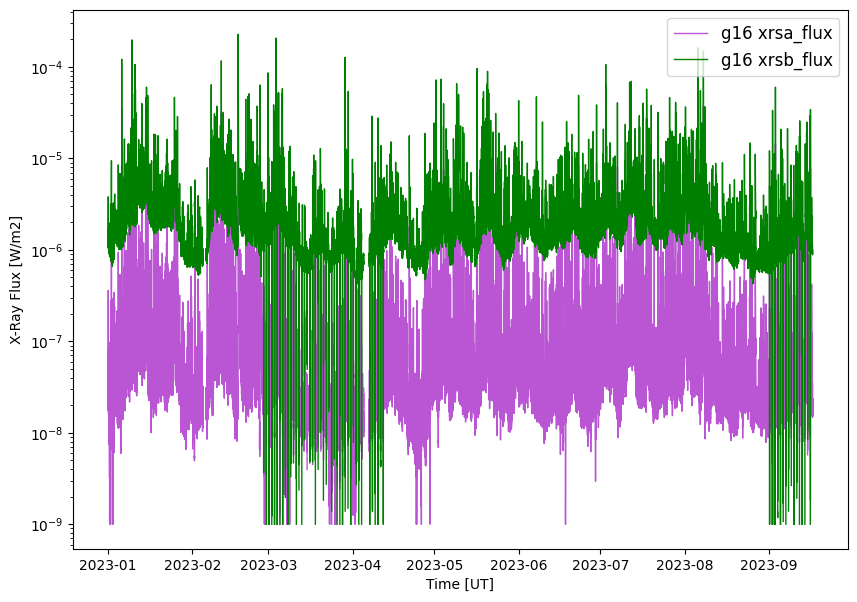

Done.



In [26]:
var_name = ["xrsa_flux", "xrsb_flux"]

chan_color = ["mediumorchid", "green", "darkviolet", "indigo", "b",
              "darkcyan", "greenyellow", "yellow", "gold", "orange",
              "orangered", "darkred"][0:num_vars]
plt.figure(0, figsize=[10, 7])
for ii in range(num_vars):
    plt.plot(
        datetime0[:],
        ff.variables[var_name[ii]][:],
        linewidth=1,
        color=chan_color[ii],
        label="{} {}".format(platform, var_name[ii]),
    )
plt.yscale("log")
plt.legend(loc="upper right", prop={"size": 12})
plt.xlabel("Time [UT]")
plt.ylabel("X-Ray Flux [{}]".format(ff[var_name[0]].units))
plt.show()
print("Done.\n")

In [27]:
file0 = "file2.nc"

ff = nc.Dataset(file0)

FileNotFoundError: [Errno 2] No such file or directory: 'file2.nc'

In [ ]:
datetime0 = cftime.num2pydate(ff.variables["time"][:], ff["time"].units)
print("Filename:  ", file0)
print("start time in file [{}]: {}".format(ff["time"].units, ff.variables["time"][0]))
print("start and end times:", datetime0[0], datetime0[-1])

In [ ]:
var_name = ["xrsa_flux", "xrsb_flux"]
chan_color = ["mediumorchid", "green", "darkviolet", "indigo", "b",
              "darkcyan", "greenyellow", "yellow", "gold", "orange",
              "orangered", "darkred"][0:num_vars]
plt.figure(0, figsize=[10, 7])
for ii in range(num_vars):
    plt.plot(
        datetime0[:],
        ff.variables[var_name[ii]][:],
        linewidth=1,
        color=chan_color[ii],
        label="{} {}".format(platform, var_name[ii]),
    )
plt.yscale("log")
plt.legend(loc="upper right", prop={"size": 12})
plt.xlabel("Time [UT]")
plt.ylabel("X-Ray Flux [{}]".format(ff[var_name[0]].units))
plt.show()
print("Done.\n")

In [ ]:
# how long does typical flares take and base the data you want to use based on that